## CS 439 - Introduction to Data Science
### Fall 2021

# Lab 3: Data Cleaning and Visualization

### Due Date: Sunday October 10, 2021 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [1]:
!pip install datascience

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:
### BEGIN SOLUTION
# estimated size of the download (based on metadata information from the site) = 1.8156 GB 
# please explain how you reached the answer
# Base on metadata information, I roughly calculated that there are about 3,200 letter and symbols in the 13 rows of data.
# There are a total of 7,375,993 rows of data.
# Therefore, estimated size of the download = (7,375,993/13)*3200 = 1.8156 *10^9 bites = 1.8156 GB
### END SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [4]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Fri Oct 29 13:41:45 2021
MD5 hash of file: d41d8cd98f00b204e9800998ecf8427e
Located at data\NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [5]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
size_of_the_file = os.path.getsize('D:/NYPD_Complaint_Data_Historic.csv')
print("Size of the file is",size_of_the_file)
size_of_the_file
#### END SOLUTION

Size of the file is 2352699423


2352699423

### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [6]:
import utils

In [7]:
# Using utils library, find the number of lines in the file
# import pysys
### BEGIN SOLUTION
file = open("D:/NYPD_Complaint_Data_Historic.CSV","r")
linecount = 0

# Reading from file
Content = file.read()
CoList = Content.split("\n")

for i in CoList:
    if i:
        linecount += 1
print("Number of lines in NYPD file is",linecount)
### END SOLUTION
linecount

Number of lines in NYPD file is 7375994


7375994

In [8]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION
csvfile = open('D:/NYPD_Complaint_Data_Historic.CSV', 'r').readlines()
filename = 1
for i in range(len(csvfile)):
    if i % 737600 == 0:
        open('NYPD_Complaint_Data_Historic_' + str(filename) + '.csv', 'w+').writelines(csvfile[i:i+737600])
        filename += 1
### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [9]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['city_country_continent.csv',
 'GlobalLandTemperaturesByMajorCity_v2.csv.gz',
 'GlobalLandTemperaturesByMajorCity_wider.csv',
 'namesbystate.zip',
 'NYPD_Complaint_Data_Historic.csv',
 'world_bank_misc.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [10]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
import pandas as pd
df = pd.read_csv("D:/NYPD_Complaint_Data_Historic.CSV")
df.head(5)

C:\Users\yutin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0   394506329   12/31/2019     17:30:00          NaN          NaN   
1   968873685   12/29/2019     16:31:00   12/29/2019     16:54:00   
2   509837549   12/15/2019     18:45:00          NaN          NaN   
3   352454313   12/28/2019     01:00:00          NaN          NaN   
4   248803469   09/05/2008     21:41:00          NaN          NaN   

   ADDR_PCT_CD      RPT_DT  KY_CD                        OFNS_DESC  PD_CD  \
0         32.0  12/31/2019    118                DANGEROUS WEAPONS  793.0   
1         47.0  12/29/2019    113                          FORGERY  729.0   
2        109.0  12/29/2019    578                    HARRASSMENT 2  638.0   
3         47.0  12/28/2019    126          MISCELLANEOUS PENAL LAW  117.0   
4          NaN  09/05/2008    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   

   ... SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0  ...      NaN              NaN  40.820927 -73.943324   
1  ...      NaN              NaN  40.885701 -73.861640   
2  ...        M              NaN  40.742281 -73.819824   
3  ...        M              NaN  40.875311 -73.847545   
4  ...      NaN              NaN  40.698827 -73.938819   

                                    Lat_Lon               PATROL_BORO  \
0   (40.82092679700002, -73.94332421899996)     PATROL BORO MAN NORTH   
1  (40.885701406000074, -73.86164032499995)         PATROL BORO BRONX   
2         (40.74228115600005, -73.81982408)  PATROL BORO QUEENS NORTH   
3   (40.87531145100007, -73.84754521099995)         PATROL BORO BRONX   
4             (40.698827283, -73.938819047)                       NaN   

  STATION_NAME  VIC_AGE_GROUP        VIC_RACE VIC_SEX  
0          NaN        UNKNOWN         UNKNOWN       E  
1          NaN        UNKNOWN         UNKNOWN       E  
2          NaN          25-44  WHITE HISPANIC       F  
3          NaN        UNKNOWN         UNKNOWN       E  
4          NaN          25-44           BLACK       M  

[5 rows x 35 columns]

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM : Nominal Data; Int
* CMPLNT_FR_DT: Ordinal Data; object
* CMPLNT_FR_TM: Interval Data; object
* CMPLNT_TO_DT: Ordinal Data; object
* CMPLNT_TO_TM: Interval Data; object
* ADDR_PCT_CD: Nominal Data; float
* RPT_DT: Ordinal Data, object
* KY_CD: Nominal Data, int
* OFNS_DESC: Nominal Data, object
* PD_CD: Ordinal Data, float
* PD_DESC: Nominal Data, object
* CRM_ATPT_CPTD_CD: Nominal Data, object
* LAW_CAT_CD: Nominal Data, object
* BORO_NM: Nominal Data, object
* LOC_OF_OCCUR_DESC: NaN, object
* PREM_TYP_DESC: NaN, object
* JURIS_DESC: Nominal Data, object
* JURISDICTION_CODE: Nominal Data, float
* PARKS_NM: NaN, object
* HADEVELOPT: NaN, object
* HOUSING_PSA: NaN, float
* X_COORD_CD: Nominal Data, float
* Y_COORD_CD: Nominal Data, float
* SUSP_AGE_GROUP: Ordinal Data, object
* SUSP_RACE: Nominal Data,  object
* SUSP_SEX: Nominal Data, object
* TRANSIT_DISTRICT: Nominal Data, float
* Latitude: Ordinal Data, float
* Longitude: Ordianl Data, float
* Lat_Lon: Interval Data, object
* PATROL_BORO: Nominal Data, object
* SATATION_NAME: Nominal Data, object
* VIC_AGE_GROUP: Ordinal Data, object
* VIC_RACE: Nominal Data, object
* VIC_SEX: Nominal Data, object
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [11]:
!pip install memory_profiler

In [12]:
### BEGIN SOLUTION
import pandas as pd
import time
start_time = time.time()
calls = pd.read_csv("NYPD_Complaint_Data_Historic_1.CSV")
print((time.time() - start_time),"seconds")
### END SOLUTION

10.746105670928955 seconds


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [13]:
### BEGIN SOLUTION

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed

calls.info(null_counts = True)
removed_column = calls.columns[calls.isnull().any()]
calls.shape
x=[]
for column in removed_column:
    if calls[column].isnull().sum()*100.0/calls.shape[0] > 50:
        x.append(column)
print(x)
### END SOLUTION

<ipython-input-13-07f2bfc66b38>:6: FutureWarning: null_counts is deprecated. Use show_counts instead
  calls.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737599 entries, 0 to 737598
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         737599 non-null  int64  
 1   CMPLNT_FR_DT       737588 non-null  object 
 2   CMPLNT_FR_TM       737599 non-null  object 
 3   CMPLNT_TO_DT       622586 non-null  object 
 4   CMPLNT_TO_TM       622915 non-null  object 
 5   ADDR_PCT_CD        737255 non-null  float64
 6   RPT_DT             737599 non-null  object 
 7   KY_CD              737599 non-null  int64  
 8   OFNS_DESC          736944 non-null  object 
 9   PD_CD              736576 non-null  float64
 10  PD_DESC            736576 non-null  object 
 11  CRM_ATPT_CPTD_CD   737599 non-null  object 
 12  LAW_CAT_CD         737599 non-null  object 
 13  BORO_NM            736561 non-null  object 
 14  LOC_OF_OCCUR_DESC  596884 non-null  object 
 15  PREM_TYP_DESC      733903 non-null  object 
 16  JU

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [14]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from? - 
# There are 130595 distinct locations where the complaints have come from.

# 2. How many age groups are represented in the data set? - 
# SUSP_AGE_GROUP have 25. VIC_AGE_GROUP have 44.
# There are 6 major age groups are represented in the data set, which are  UNKNOWN, 25-44, 45-64, 18-24, <18, 65+.

# 3. How many boroughs are included in the data set? - 
# There are 8 boroughs are included in the data set.

# 4. How many offense types are listed in this data set? - 
# There are 65 different offense types are listed in this data set.

### END SOLUTION

CMPLNT_NUM           737490
CMPLNT_FR_DT           4811
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           3619
CMPLNT_TO_TM           1440
ADDR_PCT_CD              77
RPT_DT                 3909
KY_CD                    69
OFNS_DESC                65
PD_CD                   387
PD_DESC                 379
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            74
JURIS_DESC               21
JURISDICTION_CODE        21
PARKS_NM                738
HADEVELOPT              262
HOUSING_PSA             395
X_COORD_CD            54536
Y_COORD_CD            57546
SUSP_AGE_GROUP           25
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude             130582
Longitude            128213
Lat_Lon              130595
PATROL_BORO               8
STATION_NAME            368
VIC_AGE_GROUP            44
VIC_RACE                  7
VIC_SEX                   4
dtype: int64

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [15]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby('BORO_NM')
calls_by_Boro_and_offense.groups
### END SOLUTION

{'BRONX': [1, 3, 8, 14, 15, 17, 19, 20, 26, 30, 32, 35, 37, 41, 43, 45, 46, 48, 49, 50, 58, 60, 62, 64, 65, 68, 69, 72, 75, 78, 80, 82, 83, 86, 90, 91, 92, 96, 99, 101, 102, 103, 104, 105, 106, 109, 110, 116, 119, 120, 123, 124, 126, 127, 128, 133, 134, 135, 143, 145, 151, 154, 159, 160, 164, 165, 167, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 186, 187, 190, 191, 193, 194, 195, 198, 202, 204, 210, 212, 213, 217, 219, 225, 226, 231, 232, 235, 237, 239, 240, ...], 'BROOKLYN': [6, 16, 31, 36, 44, 52, 55, 79, 88, 107, 108, 114, 115, 129, 130, 137, 138, 140, 141, 146, 147, 153, 157, 168, 171, 174, 179, 184, 189, 196, 201, 205, 211, 214, 215, 218, 224, 241, 245, 246, 247, 256, 258, 262, 266, 272, 281, 286, 292, 295, 307, 308, 313, 314, 323, 325, 329, 338, 354, 359, 366, 372, 399, 400, 401, 403, 410, 421, 428, 430, 432, 435, 439, 443, 444, 450, 452, 455, 456, 457, 467, 469, 473, 476, 479, 481, 482, 489, 491, 492, 497, 503, 506, 522, 526, 536, 541, 542, 545, 547, ...], 'MANHATTAN': [0,

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [16]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby('BORO_NM')['OFNS_DESC'].apply(pd.DataFrame)
print(calls_by_Boro_and_offense['BRONX'].dropna().unique())
### END SOLUTION
# How many offenses were committed in Bronx during the analysis period?
calls_by_Boro_and_offense = calls.groupby('BORO_NM')
print(len(calls_by_Boro_and_offense.get_group('BRONX')))

['FORGERY' 'MISCELLANEOUS PENAL LAW' 'OFF. AGNST PUB ORD SENSBLTY &'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'PETIT LARCENY' 'RAPE'
 'GRAND LARCENY OF MOTOR VEHICLE' 'SEX CRIMES' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'BURGLARY' 'DANGEROUS DRUGS'
 'DANGEROUS WEAPONS' 'VEHICLE AND TRAFFIC LAWS' 'CRIMINAL TRESPASS'
 'HARRASSMENT 2' 'OFFENSES INVOLVING FRAUD'
 'OFFENSES AGAINST PUBLIC ADMINI' 'ARSON' 'GRAND LARCENY' 'THEFT-FRAUD'
 'FRAUDS' 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING'
 'ESCAPE 3' 'NYS LAWS-UNCLASSIFIED FELONY' 'UNAUTHORIZED USE OF A VEHICLE'
 'THEFT OF SERVICES' 'OFFENSES AGAINST THE PERSON'
 'OTHER OFFENSES RELATED TO THEF' 'ENDAN WELFARE INCOMP'
 'POSSESSION OF STOLEN PROPERTY' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' 'LOITERING/GAMBLING (CARDS, DIC'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'KIDNAPPING & RELATED OFFENSES'
 "BURGLAR'S TOOLS" 'CHILD ABANDONMENT/NON SUPPORT' 'GAMBLING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'FRAUD

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [17]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby('BORO_NM')['OFNS_DESC'].apply(pd.DataFrame)
calls_by_Boro_and_offense['BRONX'].value_counts().head(5).index.unique()
### END SOLUTION

Index(['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS'],
      dtype='object')

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [18]:
### BEGIN SOLUTION
probability = calls_by_Boro_and_offense['BRONX'].value_counts()['ARSON']/calls_by_Boro_and_offense['BRONX'].count().sum()
probability
### END SOLUTION

0.002651512793860441

---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

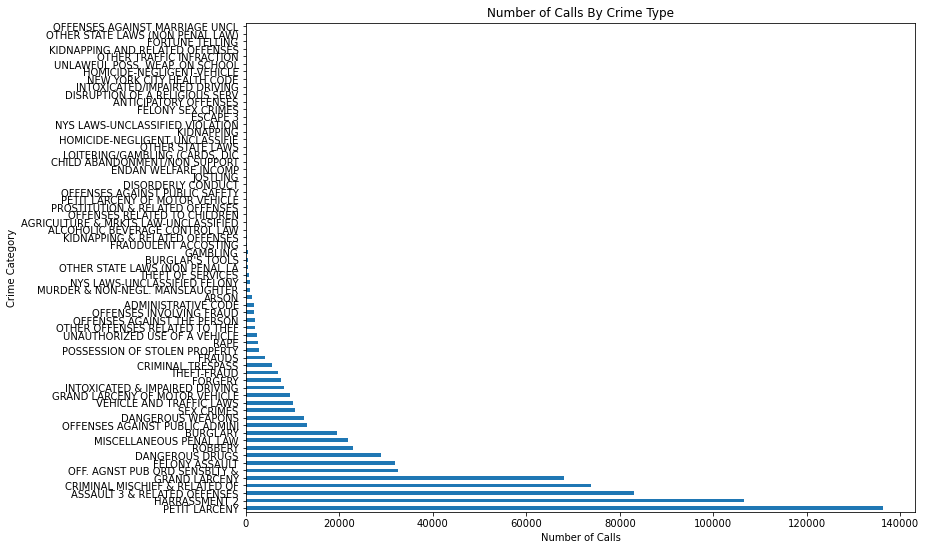

In [19]:
### BEGIN SOLUTION
ax = calls['OFNS_DESC'].value_counts().plot(kind = 'barh',figsize=(12,9))
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")
ax.set_title("Number of Calls By Crime Type")
### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

Text(0.5, 1.0, 'Number of Calls By Crime Type')

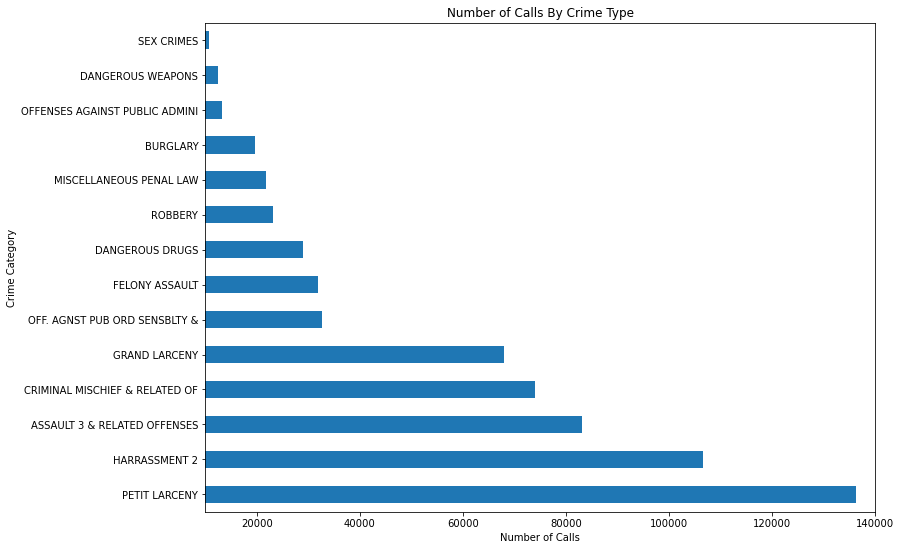

In [20]:
### BEGIN SOLUTION
ax = calls['OFNS_DESC'].value_counts()[:14].plot(kind = 'barh', xlim = [10000, 140000])
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")
ax.set_title("Number of Calls By Crime Type")
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

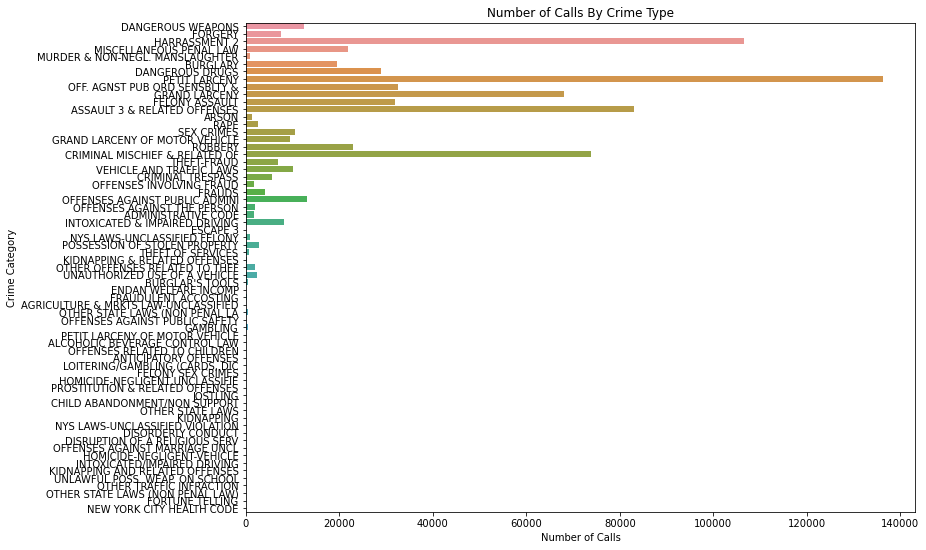

In [21]:
### BEGIN SOLUTION
ax = sns.countplot(data = calls, y = "OFNS_DESC")
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")
ax.set_title("Number of Calls By Crime Type")
### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

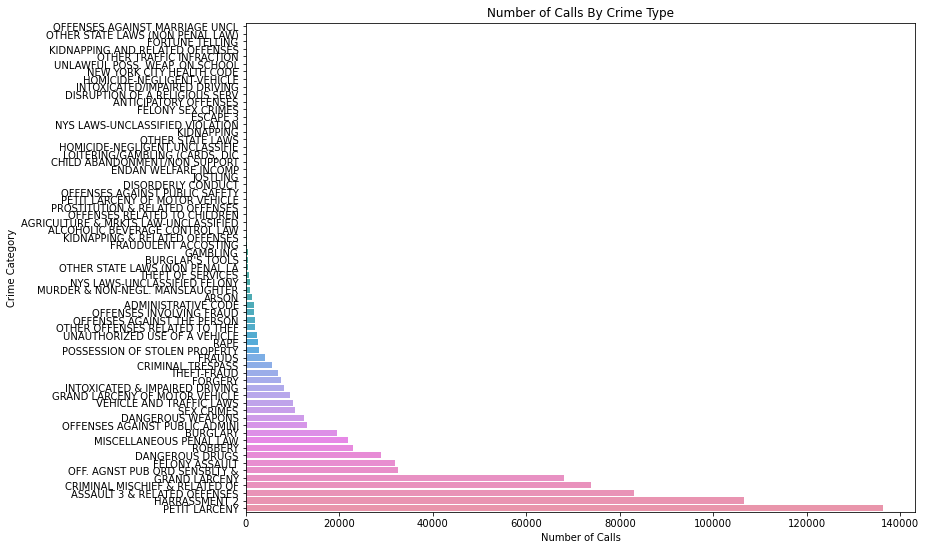

In [22]:
### BEGIN SOLUTION
ax = sns.countplot(data = calls, y = "OFNS_DESC", order = calls["OFNS_DESC"].value_counts(ascending = True).index)
ax.set_xlabel("Number of Calls")
ax.set_ylabel("Crime Category")
ax.set_title("Number of Calls By Crime Type")
### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [23]:
days = {6.0:"Sunday", 0.0:"Monday", 1.0:"Tuesday", 2.0:"Wednesday", 3.0:"Thursday", 4.0:"Friday", 5.0:"Saturday"}
### BEGIN SOLUTION
calls['CMPLNT_FR_DT'] = pd.to_datetime(calls['CMPLNT_FR_DT'], errors = 'coerce')
calls["DAY_OF_WEEK"] = calls['CMPLNT_FR_DT'].dt.dayofweek
calls["DAY_OF_WEEK"]= calls["DAY_OF_WEEK"].map(days)
calls
### END SOLUTION

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0        394506329   2019-12-31     17:30:00          NaN          NaN   
1        968873685   2019-12-29     16:31:00   12/29/2019     16:54:00   
2        509837549   2019-12-15     18:45:00          NaN          NaN   
3        352454313   2019-12-28     01:00:00          NaN          NaN   
4        248803469   2008-09-05     21:41:00          NaN          NaN   
...            ...          ...          ...          ...          ...   
737594   367204669   2014-09-04     20:25:00   09/04/2014     20:25:00   
737595   576900458   2013-11-01     20:10:00          NaN          NaN   
737596   952771628   2015-12-28     17:38:00          NaN          NaN   
737597   161192278   2014-11-11     13:20:00   11/11/2014     13:36:00   
737598   185943074   2012-11-29     20:05:00          NaN          NaN   

        ADDR_PCT_CD      RPT_DT  KY_CD                        OFNS_DESC  \
0              32.0  12/31/2019    118                DANGEROUS WEAPONS   
1              47.0  12/29/2019    113                          FORGERY   
2             109.0  12/29/2019    578                    HARRASSMENT 2   
3              47.0  12/28/2019    126          MISCELLANEOUS PENAL LAW   
4               NaN  09/05/2008    101  MURDER & NON-NEGL. MANSLAUGHTER   
...             ...         ...    ...                              ...   
737594        108.0  09/04/2014    348         VEHICLE AND TRAFFIC LAWS   
737595         44.0  11/01/2013    105                          ROBBERY   
737596        104.0  12/28/2015    359   OFFENSES AGAINST PUBLIC ADMINI   
737597         43.0  11/11/2014    344     ASSAULT 3 & RELATED OFFENSES   
737598         67.0  11/29/2012    235                  DANGEROUS DRUGS   

        PD_CD  ... TRANSIT_DISTRICT   Latitude  Longitude  \
0       793.0  ...              NaN  40.820927 -73.943324   
1       729.0  ...              NaN  40.885701 -73.861640   
2       638.0  ...              NaN  40.742281 -73.819824   
3       117.0  ...              NaN  40.875311 -73.847545   
4         NaN  ...              NaN  40.698827 -73.938819   
...       ...  ...              ...        ...        ...   
737594  916.0  ...              NaN  40.742693 -73.895654   
737595  397.0  ...              NaN  40.835021 -73.912060   
737596  750.0  ...              NaN  40.704277 -73.891848   
737597  101.0  ...              NaN  40.825463 -73.870401   
737598  567.0  ...              NaN  40.655465 -73.928829   

                                         Lat_Lon               PATROL_BORO  \
0        (40.82092679700002, -73.94332421899996)     PATROL BORO MAN NORTH   
1       (40.885701406000074, -73.86164032499995)         PATROL BORO BRONX   
2              (40.74228115600005, -73.81982408)  PATROL BORO QUEENS NORTH   
3        (40.87531145100007, -73.84754521099995)         PATROL BORO BRONX   
4                  (40.698827283, -73.938819047)                       NaN   
...                                          ...                       ...   
737594             (40.742693211, -73.895654021)  PATROL BORO QUEENS NORTH   
737595             (40.835020524, -73.912060306)         PATROL BORO BRONX   
737596             (40.704276778, -73.891847783)  PATROL BORO QUEENS NORTH   
737597             (40.825462558, -73.870401262)         PATROL BORO BRONX   
737598             (40.655465064, -73.928828752)   PATROL BORO BKLYN SOUTH   

       STATION_NAME VIC_AGE_GROUP        VIC_RACE VIC_SEX DAY_OF_WEEK  
0               NaN       UNKNOWN         UNKNOWN       E     Tuesday  
1               NaN       UNKNOWN         UNKNOWN       E      Sunday  
2               NaN         25-44  WHITE HISPANIC       F      Sunday  
3               NaN       UNKNOWN         UNKNOWN       E    Saturday  
4               NaN         25-44           BLACK       M      Friday  
...             ...           ...             ...     ...         ...  
737594          NaN         18-24  WHITE HIS

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

Text(0.5, 1.0, 'Number of Calls For Each Day of the Week')

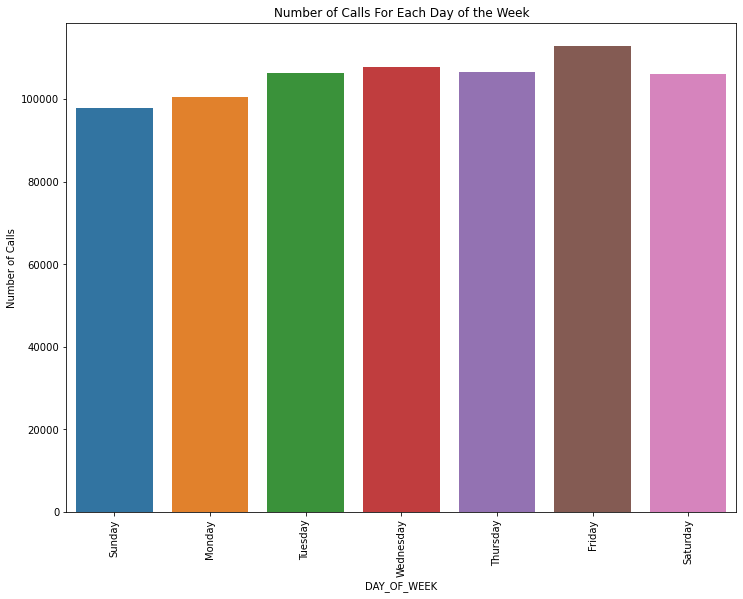

In [24]:
### BEGIN SOLUTION
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = sns.countplot(data = calls, x='DAY_OF_WEEK', order=days)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('Number of Calls')
ax.set_title('Number of Calls For Each Day of the Week')
### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

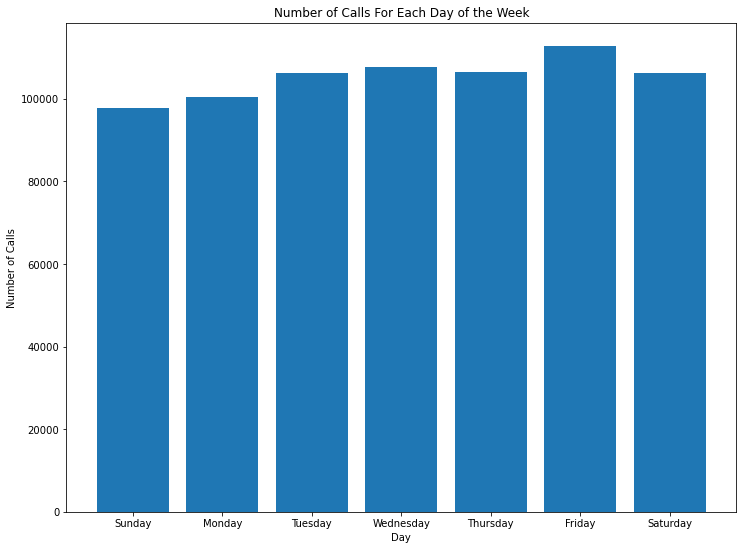

In [25]:
### BEGIN SOLUTION
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
s = calls['DAY_OF_WEEK'].value_counts().reindex(days)
s.sort_values()
coolIndex = s.index
plt.bar(coolIndex,s[coolIndex])
plt.ylabel("Number of Calls")
plt.xlabel("Day")
plt.title("Number of Calls For Each Day of the Week");
### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

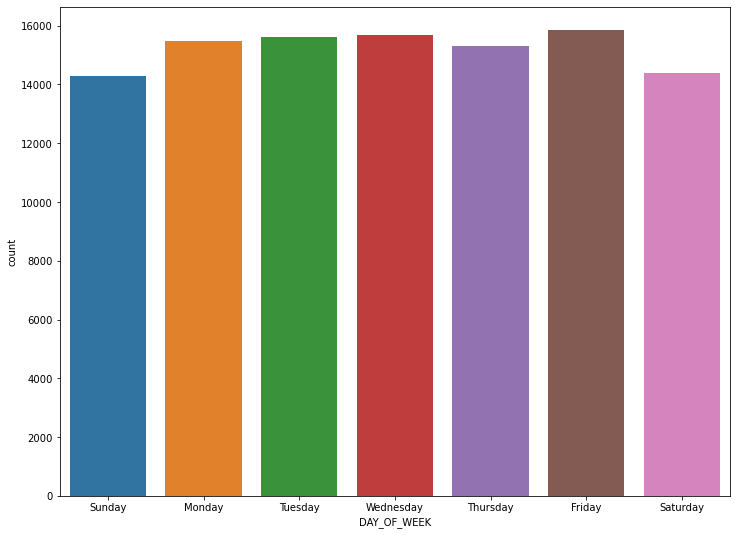

In [26]:
### BEGIN SOLUTION
harrassment_2 = calls[calls['OFNS_DESC']=='HARRASSMENT 2']
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
harrassment_2_graph = sns.countplot(data=harrassment_2, x='DAY_OF_WEEK', order=days)
ax = plt.gca()
### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION

Harassment 2 incidents occur every day. In contrast, the number of occurrences on weekends is less than Monday to Friday
##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

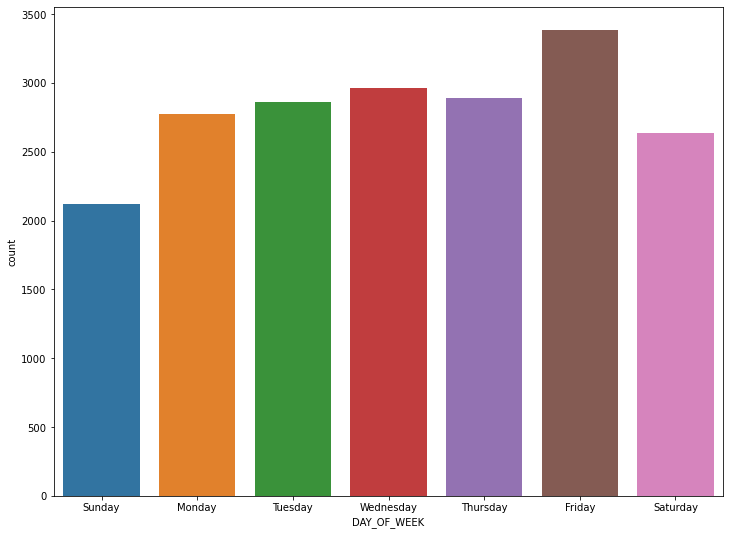

In [27]:
### BEGIN SOLUTION
burglary = calls[calls['OFNS_DESC']=='BURGLARY']
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
burglary_graph = sns.countplot(data=burglary, x='DAY_OF_WEEK', order=days)
ax = plt.gca()
### END SOLUTION

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [28]:
calls["Hour"] = calls["CMPLNT_TO_TM"].str.slice(0,2).replace(np.NaN,0).astype('int')

In [29]:
### BEGIN SOLUTION
calls["Hour"] = calls["CMPLNT_TO_TM"].str.slice(0,2).replace(np.NaN,0).astype('int')
### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

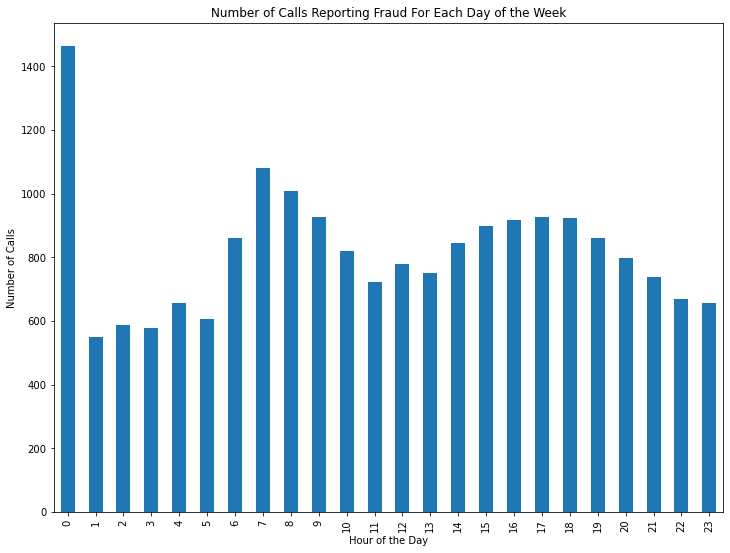

In [30]:
### BEGIN SOLUTION
ax = calls[calls["OFNS_DESC"] == "BURGLARY"]['Hour'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");
### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

C:\Users\yutin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


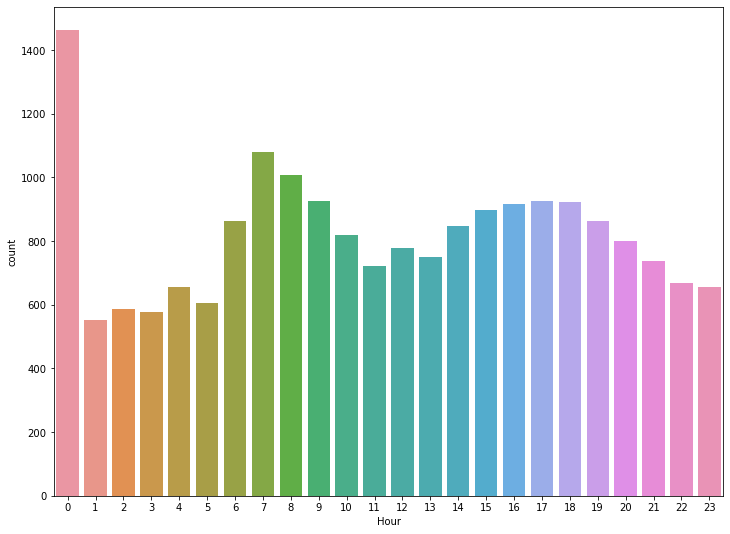

In [31]:
### BEGIN SOLUTION
cax = sns.countplot(calls[calls["OFNS_DESC"] == "BURGLARY"]['Hour'])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");
### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION


#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

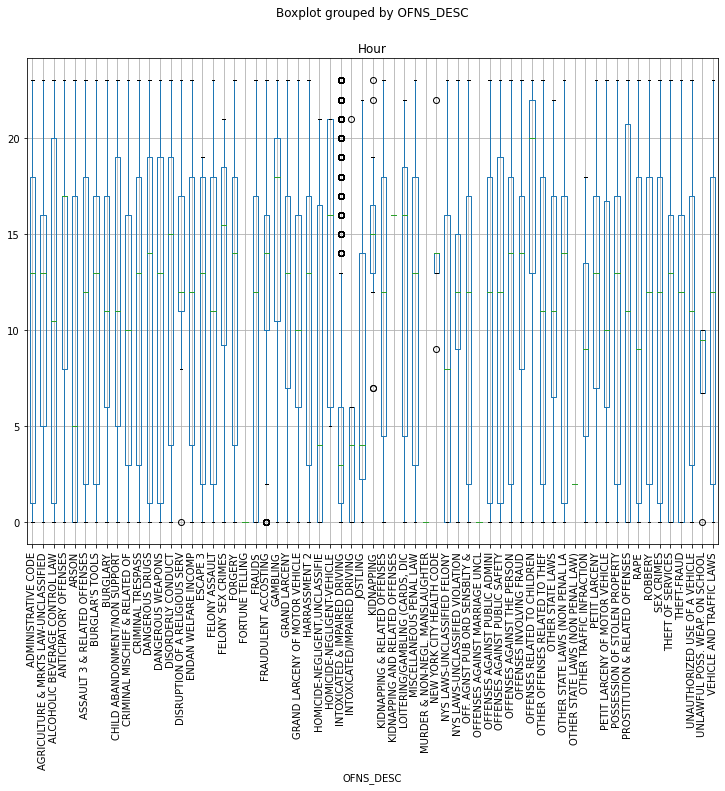

In [32]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

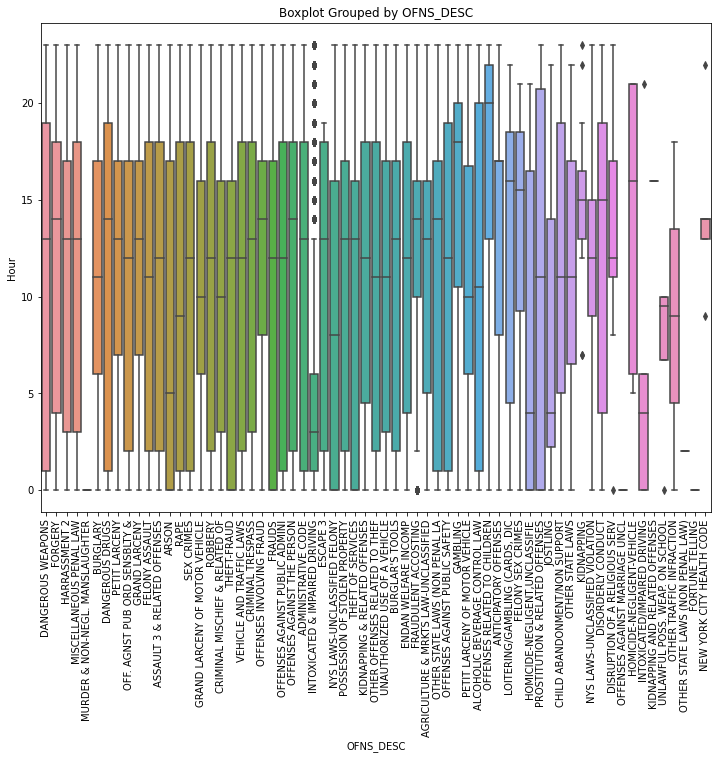

In [33]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(data=calls, x='OFNS_DESC', y='Hour')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("OFNS_DESC")
ax.set_ylabel("Hour")
ax.set_title("Boxplot Grouped by OFNS_DESC");
ax = plt.gca()
# PROSTITUTION & RELATED OFFENSES appears to have the largest interquartile range. 
### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [34]:
!pip install --upgrade folium

In [35]:
buNYC = calls[calls["OFNS_DESC"] == "BURGLARY"][:20]
len(buNYC)

20

In [36]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime
import folium
### BEGIN SOLUTION
import json
import requests
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
map1 = folium.Map(location=[40.7128,-74.0060], zoom_start = 10)
vis = json.loads(requests.get(f'{url}/vis1.json').text)
calls = calls.dropna(subset=['Latitude', 'Longitude'])
calls1 = calls[calls['OFNS_DESC'] == 'BURGLARY'].reset_index()

for i in range(100):
    a = calls1['Latitude'][i]
    b = calls1['Longitude'][i]
    folium.Marker(
    location = [a,b],
    popup = folium.Popup(max_width = 450).add_child(folium.Vega(vis, width =450, height=300))).add_to(map1)
### END SOLUTION

In [37]:
map1

 ## Congratulations !!!

@2021 A.D. Gunawardena. Many people contributed to this lab including CS439 TA Liqin Long (currently @ Google). Much credit go to my friend and Princeton colleague Prof. Josh Hug (@ Berkeley), and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites.